# VITS long text

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/vits-long-text](https://github.com/huseinzol05/malaya-speech/tree/master/example/vits-long-text).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

`pyaudio` is not available, `malaya_speech.streaming.pyaudio` is not able to use.


### TTS model

We are going to use VITS, really fast and accurate, plus not required a vocoder!

### List available VITS

In [3]:
malaya_speech.tts.available_vits()

Size (MB) Understand punctuation  \
mesolitica/VITS-osman                    145                   True   
mesolitica/VITS-yasmin                   145                   True   
mesolitica/VITS-female-singlish          145                   True   
mesolitica/VITS-haqkiem                  145                   True   
mesolitica/VITS-orkid                    145                   True   
mesolitica/VITS-bunga                    145                   True   
mesolitica/VITS-jebat                    145                   True   
mesolitica/VITS-tuah                     145                   True   
mesolitica/VITS-male                     145                   True   
mesolitica/VITS-female                   145                   True   
mesolitica/VITS-multispeaker-clean       159                   True   
mesolitica/VITS-multispeaker-noisy       159                   True   

                                   Is lowercase num speakers  
mesolitica/VITS-osman                     False            1  
mesolitica/VITS-yasmin                    False            1  
mesolitica/VITS-female-singlish            True            1  
mesolitica/VITS-haqkiem                    True            1  
mesolitica/VITS-orkid                     False            1  
mesolitica/VITS-bunga                     False            1  
mesolitica/VITS-jebat                     False            1  
mesolitica/VITS-tuah                      False            1  
mesolitica/VITS-male                      False            1  
mesolitica/VITS-female                    False            1  
mesolitica/VITS-multispeaker-clean        False            9  
mesolitica/VITS-multispeaker-noisy        False            3

### Load VITS model

Fastspeech2 use text normalizer from Malaya, https://malaya.readthedocs.io/en/latest/load-normalizer.html#Load-normalizer,

Make sure you install Malaya version > 4.0 to make it works, **to get better speech synthesis, make sure Malaya version > 4.9.1**,

```bash
pip install malaya -U
```

```python
def vits(model: str = 'mesolitica/VITS-osman', **kwargs):
    """
    Load VITS End-to-End TTS model.

    Parameters
    ----------
    model : str, optional (default='mesolitica/VITS-osman')
        Check available models at `malaya_speech.tts.available_vits()`.
    Returns
    -------
    result : malaya_speech.torch_model.synthesis.VITS class
    """
```

In [4]:
yasmin = malaya_speech.tts.vits(model = 'mesolitica/VITS-yasmin')
osman = malaya_speech.tts.vits(model = 'mesolitica/VITS-osman')

/home/husein/.local/lib/python3.8/site-packages/malaya/tokenizer.py:202: FutureWarning: Possible nested set at position 3361
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/husein/.local/lib/python3.8/site-packages/malaya/tokenizer.py:202: FutureWarning: Possible nested set at position 3879
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


`yasmin` and `osman` are the best speakers for long text TTS task.

### Load sentence tokenizer

We are going to use Malaya sentence tokenizer, can split even for very complex pattern, https://malaya.readthedocs.io/en/latest/load-tokenizer.html#Sentence-tokenizer

Make sure installed Malaya first,

```bash
pip3 install malaya
```

In [5]:
import malaya

In [6]:
long_text = """
SHAH ALAM - Pertubuhan Kebajikan Anak Bersatu Selangor (PKABS) bersetuju pihak kerajaan mewujudkan Suruhanjaya Siasatan Diraja (RCI) untuk menyiasat isu kartel daging.

Pengerusinya, Rahmadin Alimuddin berkata, perkara tersebut perlu disiasat sebaiknya kerana isu logo halal palsu membimbangkan umat Islam di negara ini.

Menurutnya, siasatan juga dapat memastikan pembekal daging beku mengikut piawaian yang ditetapkan oleh kerajaan Malaysia sebelum menjualnya di pasaran.

“Saya berharap pihak yang menyiasat isu daging kartel dapat menyelesaikan isu ini dengan adil supaya rakyat Malaysia tidak ragu dengan daging beku yang berada di pasaran,” katanya ketika dihubungi Sinar Harian pada Sabtu.

Terdahulu, Rahmadin dan Presiden Gagasan Baru Harapan Malaysia (GBHM), Mohd Zulfitri Mohd Basir telah menghantar memorandum kepada Suruhanjaya Pencegahan Rasuah Malaysia (SPRM) bagi meminta pihak tersebut menjalankan siasatan berkenaan kes kartel daging import haram di Senai, Johor awal Disember lalu.

Penyerahan memorandum tersebut meminta pihak berkuasa mendedahkan kartel yang terlibat dalam sindiket itu selain meminta penjelasan daging tersebut boleh terlepas daripada pihak berkuasa.
"""

### Use Pipeline

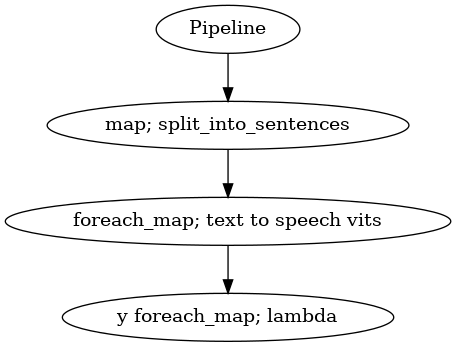

In [7]:
p = Pipeline()
pipeline = (
    p.map(malaya.text.function.split_into_sentences)
    .foreach_map(yasmin)
    .foreach_map(lambda x: x['y'], name = 'y')
)
p.visualize()

In [8]:
%%time

r = p(long_text)

CPU times: user 2min 33s, sys: 7.39 s, total: 2min 40s
Wall time: 18.7 s


In [9]:
r.keys()

dict_keys(['split_into_sentences', 'text-to-speech-vits', 'y'])

In [11]:
silent_period = np.array([0] * int(22050 * 0.5))
concated = []
for i in range(len(r['y'])):
    c = [r['y'][i]]
    if i < len(r['y']) - 1:
        c.append(silent_period)
    concated.extend(c)

In [12]:
ipd.Audio(np.concatenate(concated), rate = 22050)

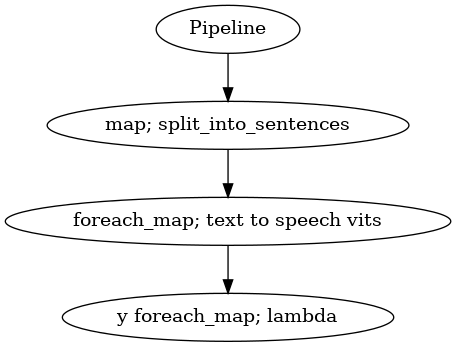

In [13]:
p = Pipeline()
pipeline = (
    p.map(malaya.text.function.split_into_sentences)
    .foreach_map(osman)
    .foreach_map(lambda x: x['y'], name = 'y')
)
p.visualize()

In [14]:
%%time

r = p(long_text)

CPU times: user 2min 20s, sys: 6.33 s, total: 2min 26s
Wall time: 15.9 s


In [15]:
concated = []
for i in range(len(r['y'])):
    c = [r['y'][i]]
    if i < len(r['y']) - 1:
        c.append(silent_period)
    concated.extend(c)

In [16]:
ipd.Audio(np.concatenate(concated), rate = 22050)